**Nim : 211351150** <br>
**Nama : Winda Ayu Melati**<br>
**Kelas : Informatika - Pagi A**<br>


## **IMPORT DATA DARI KAGGLE**

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"windaayumelati","key":"03748c9e298dbec2b99f164a2b651ba9"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d elakiricoder/gender-classification-dataset

Dataset URL: https://www.kaggle.com/datasets/elakiricoder/gender-classification-dataset
License(s): CC0-1.0
  0% 0.00/19.0k [00:00<?, ?B/s]
100% 19.0k/19.0k [00:00<00:00, 57.5MB/s]


In [ ]:
!mkdir gender-classification-dataset
!unzip gender-classification-dataset.zip -d gender-classification-dataset
!ls gender-classification-dataset

Archive:  gender-classification-dataset.zip
  inflating: gender-classification-dataset/gender_classification_v7.csv  
gender_classification_v7.csv


## **IMPORT LIBRARY**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

## **LOAD DATASET**

In [ ]:
df = pd.read_csv("gender-classification-dataset/gender_classification_v7.csv")

In [ ]:
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


## **DATA DISCOVERY**

In [ ]:
df.shape

(5001, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB


In [ ]:
df.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [ ]:
# Mengecek duplikat keseluruhan pada DataFrame
overall_duplicates = df[df.duplicated()]
print("Duplikat Keseluruhan:")
print(overall_duplicates)

Duplikat Keseluruhan:
      long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long  \
59            1               14.1                 5.9          0          0   
66            1               14.2                 6.2          0          0   
175           1               12.7                 5.7          1          1   
230           1               12.9                 5.1          0          0   
261           1               13.0                 6.2          1          1   
...         ...                ...                 ...        ...        ...   
4996          1               13.6                 5.1          0          0   
4997          1               11.9                 5.4          0          0   
4998          1               12.9                 5.7          0          0   
4999          1               13.2                 6.2          0          0   
5000          1               15.4                 5.4          1          1   

      lips_thin  

In [ ]:
# Menghapus duplikat dan mengganti DataFrame yang ada
df.drop_duplicates(inplace=True)

# Menampilkan DataFrame setelah menghapus duplikat
print("DataFrame setelah menghapus duplikat:")
print(df)


DataFrame setelah menghapus duplikat:
      long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long  \
0             1               11.8                 6.1          1          0   
1             0               14.0                 5.4          0          0   
2             0               11.8                 6.3          1          1   
3             0               14.4                 6.1          0          1   
4             1               13.5                 5.9          0          0   
...         ...                ...                 ...        ...        ...   
4986          1               11.7                 6.1          1          1   
4990          1               12.6                 5.7          0          0   
4992          1               14.1                 7.0          1          1   
4993          1               11.6                 5.9          0          0   
4995          1               12.3                 6.9          0          1   

 

In [ ]:
df = df.reset_index(drop=True)  # Mereset indeks dan menghapus indeks lama

In [ ]:
df.shape

(3233, 8)

In [ ]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


## **DATA PREPARATION**

In [ ]:
numerical = []
catgcols = []

for col in df.columns:
    if df[col].dtype == "float64" or df[col].dtype == "int64":
        numerical.append(col)
    else:
        catgcols.append(col)

for col in df.columns:
    if col in numerical:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

In [ ]:
numerical

['long_hair',
 'forehead_width_cm',
 'forehead_height_cm',
 'nose_wide',
 'nose_long',
 'lips_thin',
 'distance_nose_to_lip_long']

In [ ]:
catgcols

['gender']

In [ ]:
df['gender'].value_counts()

gender
Male      1783
Female    1450
Name: count, dtype: int64

In [ ]:
ind_col = [col for col in df.columns if col != 'gender']
dep_col = 'gender'

In [ ]:
le = LabelEncoder()

for col in catgcols:
  df[col] = le.fit_transform(df[col])

In [ ]:
df['gender'] = le.fit_transform(df['gender'])

In [ ]:
x = df[ind_col] #feature
y = df[dep_col] #label

In [ ]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,1
1,0,14.0,5.4,0,0,1,0,0
2,0,11.8,6.3,1,1,1,1,1
3,0,14.4,6.1,0,1,1,1,1
4,1,13.5,5.9,0,0,0,0,0


In [ ]:
x = df.drop(columns='gender', axis=1)
y = df['gender']

#**MODELING**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.3, random_state=42, stratify=y)

print('train shape:', X_train.shape)
print('test shape:', X_test.shape)

train shape: (2263, 7)
test shape: (970, 7)


In [ ]:
model = Sequential()

model.add (Dense(8, activation='relu', input_dim=x.shape[-1]))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 64        
                                                                 
 dense_1 (Dense)             (None, 16)                144       
                                                                 
 dense_2 (Dense)             (None, 2)                 34        
                                                                 
Total params: 242 (968.00 Byte)
Trainable params: 242 (968.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


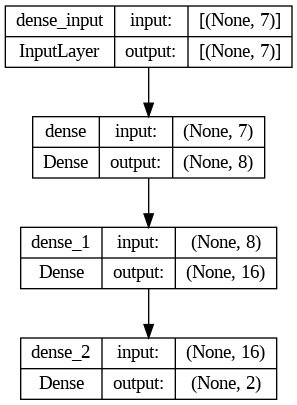

In [ ]:
plot_model(model, show_shapes = True)

In [ ]:
optim = Adam(lr=0.001)
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer=optim,
              metrics = ['acc'])

batch_size=1
epochs = 15

history = model.fit(X_train, Y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    shuffle=True,
                    validation_split=0.1)

Epoch 1/15
2036/2036 [==============================] - 4s 2ms/step - loss: 0.6752 - acc: 0.5855 - val_loss: 0.5729 - val_acc: 0.6300
Epoch 2/15
2036/2036 [==============================] - 3s 2ms/step - loss: 0.3799 - acc: 0.8620 - val_loss: 0.1873 - val_acc: 0.9471
Epoch 3/15
2036/2036 [==============================] - 3s 1ms/step - loss: 0.1671 - acc: 0.9455 - val_loss: 0.1214 - val_acc: 0.9383
Epoch 4/15
2036/2036 [==============================] - 3s 2ms/step - loss: 0.1410 - acc: 0.9420 - val_loss: 0.1067 - val_acc: 0.9427
Epoch 5/15
2036/2036 [==============================] - 3s 1ms/step - loss: 0.1351 - acc: 0.9391 - val_loss: 0.1316 - val_acc: 0.9207
Epoch 6/15
2036/2036 [==============================] - 2s 1ms/step - loss: 0.1322 - acc: 0.9396 - val_loss: 0.1165 - val_acc: 0.9295
Epoch 7/15
2036/2036 [==============================] - 2s 1ms/step - loss: 0.1310 - acc: 0.9430 - val_loss: 0.1088 - val_acc: 0.9295
Epoch 8/15
2036/2036 [==============================] - 2s 1ms

In [ ]:
from sklearn.metrics import accuracy_score
pred = np.argmax(model.predict(X_test), axis=1)
print(accuracy_score(Y_test, pred))

31/31 [==============================] - 0s 803us/step
0.9484536082474226


In [ ]:
model.evaluate(X_test, Y_test)

31/31 [==============================] - 0s 2ms/step - loss: 0.1234 - acc: 0.9485


[0.12335697561502457, 0.9484536051750183]

##**SIMULASI DATA**

In [ ]:
prediction = model.predict([[1, 11.8, 6.1, 1, 0, 1, 1]])

predicted_class = np.argmax(prediction, axis=-1)

if predicted_class == 1:
    print('Male')
else:
    print('Female')

1/1 [==============================] - 0s 47ms/step
Male


In [ ]:
prediction = model.predict([[0, 14.0, 5.4, 0, 0, 1, 0]])

predicted_class = np.argmax(prediction, axis=-1)

if predicted_class == 1:
    print('Male')
else:
    print('Female')

1/1 [==============================] - 0s 22ms/step
Female


##**SAVE MODEL**

In [ ]:
model.save('./gender.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model = tf.keras.models.load_model('./gender.h5')
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()
open("./gender.tflite", "wb").write(tflite_model)

3064